In [1]:
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpecFromSubplotSpec
from seaborn import kdeplot

import os.path as op
import sys
sys.path.append("../")

from src import regmod
from src import utils
from src import solver

import importlib

## Loading fiber and F-tract data

Text(0, 0.5, 'proportion of delays')

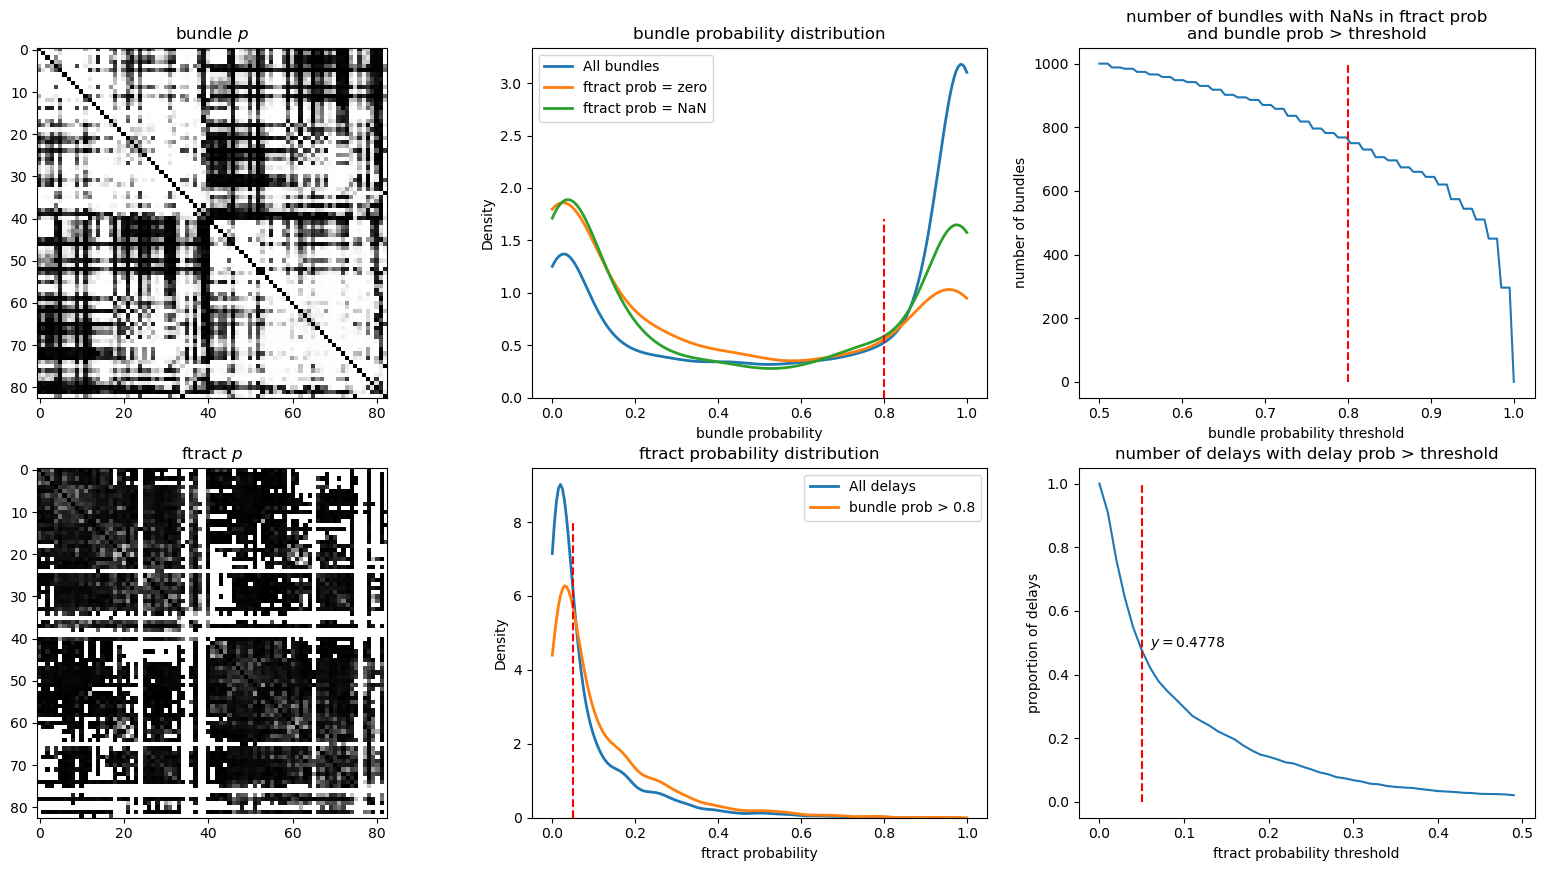

In [2]:
path_to_data = "../resources"

# Could be 50, 100, 200, 400
delay_max = 400
path_to_ftract = f"/Users/acionca/data/F-TRACT-090624/{delay_max}" #/probability.txt.gz"

#filename = "adjacency_atlas.pkl"
filename = "bundle_probability_atlas.pkl"

adj = utils.load(op.join(path_to_data, filename))
# TODO + NOTE: temporary truncation to remove (by michael)
#adj = adj[:84, :84]
adj = adj[:83, :83]
adj -= np.diag(np.diag(adj))

bundle_prob_thresh = 0.8

adj_reduced = (adj > bundle_prob_thresh).copy()

bundle_prob = utils.load(op.join(path_to_data, "bundle_probability_atlas.pkl"))
bundle_prob = bundle_prob[:83, :83]
bundle_prob -= np.diag(np.diag(bundle_prob))
ftract_prob = utils.load(op.join(path_to_data, "adj_probability_ftract.pkl"))
ftract_prob = ftract_prob[:83, :83]

#y_ground_mat = utils.load(op.join(path_to_data, "conductance-delay_Lausanne2008_33.pkl"))
#y_ground_mat = np.nan_to_num(y_ground_mat['median'])

with open(op.join(path_to_data, 'peak_delay__median.txt')) as f:
    text = f.readlines()

y_ground_mat = []
for t in text[8:]:
    y_ground_mat.append(t.split(' '))
y_ground_mat = np.array(y_ground_mat).astype(float)
y_ground_mat = np.nan_to_num(y_ground_mat[:-1, :-1])
#y_ground_mat = np.nan_to_num(y_ground_mat)

prob_thresh = 0
y_ground_mat *= ftract_prob > prob_thresh
y_ground = solver.torch.tensor(utils.remove_diagonal_entries(y_ground_mat).flatten())

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

zero_prob = ftract_prob <= prob_thresh
nan_prob = np.isnan(ftract_prob)

axes[0, 0].imshow(bundle_prob, cmap="binary_r", interpolation="none")
axes[0, 0].set_title("bundle $p$")

kdeplot(bundle_prob.flatten(), ax=axes[0, 1], label="All bundles", bw_adjust=0.8, clip=(0, 1), lw=2)
kdeplot(bundle_prob[zero_prob].flatten(), ax=axes[0, 1], label="ftract prob = zero", bw_adjust=0.8, clip=(0, 1), lw=2)
kdeplot(bundle_prob[nan_prob].flatten(), ax=axes[0, 1], label="ftract prob = NaN", bw_adjust=0.8, clip=(0, 1), lw=2)
axes[0, 1].plot([bundle_prob_thresh]*2, [0, 1.7], "r--")

axes[0, 1].legend()
axes[0, 1].set_title("bundle probability distribution")
axes[0, 1].set_xlabel("bundle probability")

x = np.linspace(0.5, 1, 100)

y = np.zeros_like(x)
for i, bundle_thresh in enumerate(x):
    y[i] = np.logical_and(nan_prob, bundle_prob > bundle_thresh).sum()

axes[0, 2].plot(x, y)
axes[0, 2].plot([bundle_prob_thresh]*2, [0, y.max()], "r--")

axes[0, 2].set_title("number of bundles with NaNs in ftract prob\nand bundle prob > threshold")
axes[0, 2].set_xlabel("bundle probability threshold")
axes[0, 2].set_ylabel("number of bundles")

axes[1, 0].imshow(ftract_prob, cmap="binary_r", interpolation="none")
axes[1, 0].set_title("ftract $p$")

kdeplot(ftract_prob.flatten(), ax=axes[1, 1], label="All delays", bw_adjust=1, clip=(0, 1), lw=2)
kdeplot(ftract_prob[bundle_prob > bundle_prob_thresh].flatten(), ax=axes[1, 1],
        label=f"bundle prob > {bundle_prob_thresh}", bw_adjust=1, clip=(0, 1), lw=2)

prob_thresh = 0.05

axes[1, 1].plot([prob_thresh]*2, [0, 8], "r--")

#axes[1, 1].set_yscale("log")
axes[1, 1].legend()
axes[1, 1].set_title("ftract probability distribution")
axes[1, 1].set_xlabel("ftract probability")

x = np.arange(0, 0.5, 0.01)

y = np.zeros_like(x)
for i, t in enumerate(x):
    y[i] = (ftract_prob > t).sum()/(ftract_prob > 0).sum()

axes[1, 2].plot(x, y)

y_pos = np.where(x == prob_thresh)[0][0]
axes[1, 2].plot([prob_thresh]*2, [0, y.max()], "r--")
axes[1, 2].text(prob_thresh+0.01, y[y_pos]+0.01, f"$y={y[y_pos]:1.4f}$")

axes[1, 2].set_title("number of delays with delay prob > threshold")
axes[1, 2].set_xlabel("ftract probability threshold")
axes[1, 2].set_ylabel("proportion of delays")

#fig.savefig("../figures/bundle_ftract_probabilities.png", dpi=100)

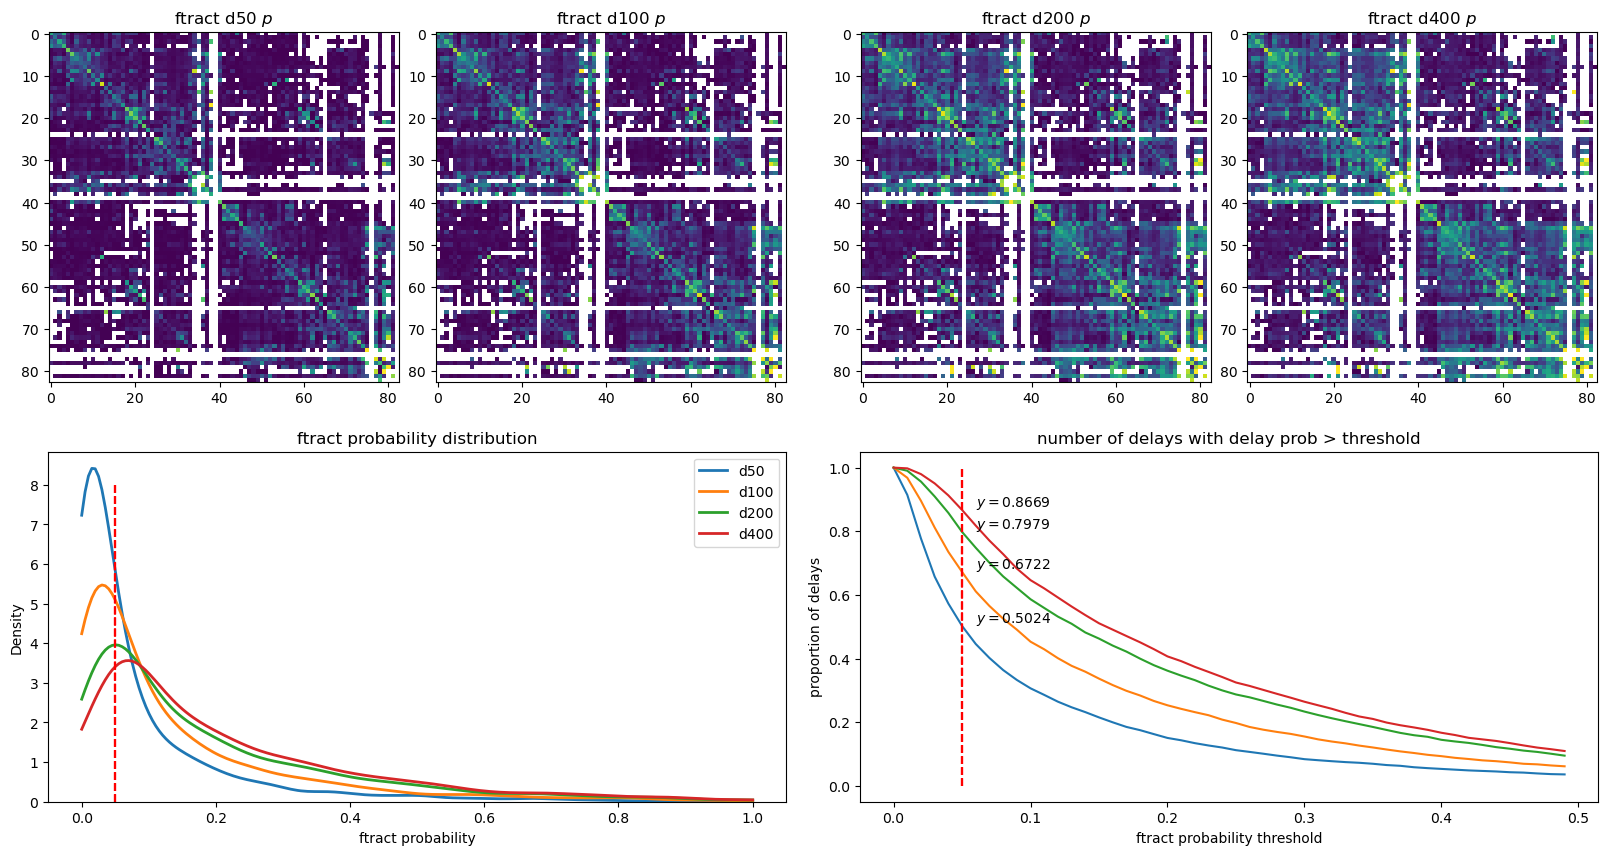

In [8]:
path_to_data = "../resources"

# Could be 50, 100, 200, 400
delay_max = 400
path_to_ftract = f"/Users/acionca/data/F-TRACT-090624/{delay_max}" #/probability.txt.gz"

#filename = "adjacency_atlas.pkl"
filename = "bundle_probability_atlas.pkl"

adj = utils.load(op.join(path_to_data, filename))
# TODO + NOTE: temporary truncation to remove (by michael)
#adj = adj[:84, :84]
adj = adj[:83, :83]
adj -= np.diag(np.diag(adj))

bundle_prob_thresh = 0.8

adj_reduced = (adj > bundle_prob_thresh).copy()

bundle_prob = utils.load(op.join(path_to_data, "bundle_probability_atlas.pkl"))
bundle_prob = bundle_prob[:83, :83]
bundle_prob -= np.diag(np.diag(bundle_prob))

# Could be 50, 100, 200, 400
delay_max = 400

fig, axes = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={"wspace": 0.1})

for ax in axes[0]:
    ax.axis("off")

gs1 = GridSpecFromSubplotSpec(1, 2, subplot_spec=axes[0, 0], wspace=.1)
gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=axes[0, 1], wspace=.1)

ax_row = [fig.add_subplot(gs1[0]), fig.add_subplot(gs1[1]), fig.add_subplot(gs2[0]), fig.add_subplot(gs2[1]),]

for delay_i, delay_max in enumerate([50, 100, 200, 400]):
    path_to_ftract = f"/Users/acionca/data/F-TRACT-090624/{delay_max}" #/probability.txt.gz"
    ftract_prob = np.genfromtxt(op.join(path_to_ftract, "probability.txt"))
    ftract_prob = ftract_prob[:83, :83]

    # /Users/acionca/data/F-TRACT-090624/400/peak_delay__median.txt.gz
    y_ground_mat = np.genfromtxt(op.join(path_to_ftract, "peak_delay__median.txt"))

    #if delay_max == 50:
    #    axes[0, 0].imshow(ftract_prob, interpolation="none")
    #    utils.add_cbar(fig, axes[0, 0])
    #    axes[0, 0].set_title(f"ftract d{delay_max} $p$")
    #if delay_max == 400:
    #    axes[0, 1].imshow(ftract_prob, interpolation="none")
    #    utils.add_cbar(fig, axes[0, 1])
    #    axes[0, 1].set_title(f"ftract d{delay_max} $p$")

    ax_row[delay_i].imshow(ftract_prob, interpolation="none")
    #utils.add_cbar(fig, ax_row[delay_i])
    ax_row[delay_i].set_title(f"ftract d{delay_max} $p$")

    kdeplot(ftract_prob.flatten(), ax=axes[1, 0], label=f"d{delay_max}", bw_adjust=1, clip=(0, 1), lw=2)
    #kdeplot(ftract_prob.flatten(), ax=axes[1], label="All delays", bw_adjust=1, clip=(0, 1), lw=2)
    #kdeplot(ftract_prob[bundle_prob > bundle_prob_thresh].flatten(), ax=axes[1],
    #        label=f"bundle prob > {bundle_prob_thresh}", bw_adjust=1, clip=(0, 1), lw=2)

    prob_thresh = 0.05

    axes[1, 0].plot([prob_thresh]*2, [0, 8], "r--")

    axes[1, 0].legend()
    axes[1, 0].set_title("ftract probability distribution")
    axes[1, 0].set_xlabel("ftract probability")

    x = np.arange(0, 0.5, 0.01)

    y = np.zeros_like(x)
    for i, t in enumerate(x):
        y[i] = (ftract_prob > t).sum()/(ftract_prob > 0).sum()

    axes[1, 1].plot(x, y)

    y_pos = np.where(x == prob_thresh)[0][0]
    axes[1, 1].plot([prob_thresh]*2, [0, y.max()], "r--")
    axes[1, 1].text(prob_thresh+0.01, y[y_pos]+0.01, f"$y={y[y_pos]:1.4f}$")

    axes[1, 1].set_title("number of delays with delay prob > threshold")
    axes[1, 1].set_xlabel("ftract probability threshold")
    axes[1, 1].set_ylabel("proportion of delays")

#fig.savefig("../figures/bundle_ftract_probabilities.png", dpi=100)

Text(0, 0.5, 'ftract delays $m$')

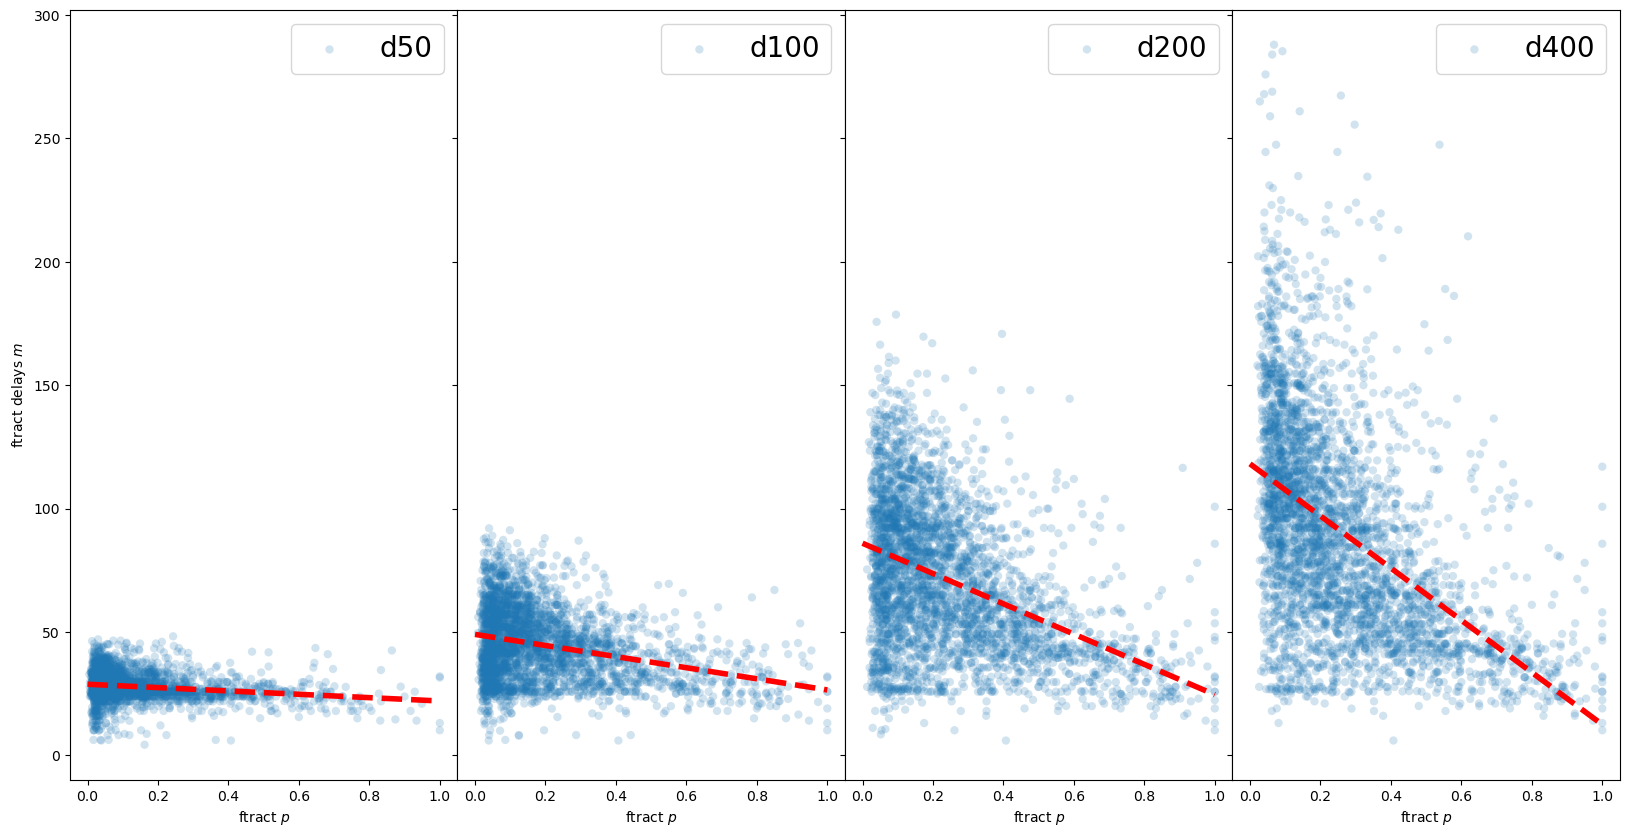

In [11]:
from scipy.stats import linregress


fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True, gridspec_kw={"wspace": 0})

for delay_max, ax in zip([50, 100, 200, 400], axes):
    path_to_ftract = f"/Users/acionca/data/F-TRACT-090624/{delay_max}" #/probability.txt.gz"
    ftract_prob = np.genfromtxt(op.join(path_to_ftract, "probability.txt"))
    ftract_prob = ftract_prob[:83, :83]

    # /Users/acionca/data/F-TRACT-090624/400/peak_delay__median.txt.gz
    y_ground_mat = np.genfromtxt(op.join(path_to_ftract, "peak_delay__median.txt"))
    y_ground_mat = y_ground_mat[:83, :83]

    nan_mask = np.isnan(np.isnan(ftract_prob))
    nan_mask = np.logical_or(nan_mask, np.isnan(y_ground_mat))

    res = linregress(ftract_prob[~ nan_mask], y_ground_mat[~ nan_mask])
    
    ax.scatter(ftract_prob[~nan_mask], y_ground_mat[~nan_mask], alpha=0.2, edgecolors="none", label=f"d{delay_max}")
    
    ax.plot([0, 1], [res.intercept, res.intercept + res.slope], "r--", lw=4)

    ax.legend(fontsize=20)
    ax.set_xlabel("ftract $p$")

axes[0].set_ylabel("ftract delays $m$")